In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

vertebral_column = fetch_ucirepo(id=212)

In [70]:
df = vertebral_column["data"]["original"]
df.replace({"Spondylolisthesis": 1, "Hernia": 1, "Normal":0}, inplace=True)
independent_variables = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
target = ["class"]
df.to_csv("/content/drive/MyDrive/Colab Notebooks/dsci_552_hw/HW1/vertebral_classification/data/data.csv")
df_pos = df[df["class"] == 1]
df_neg = df[df["class"] == 0]

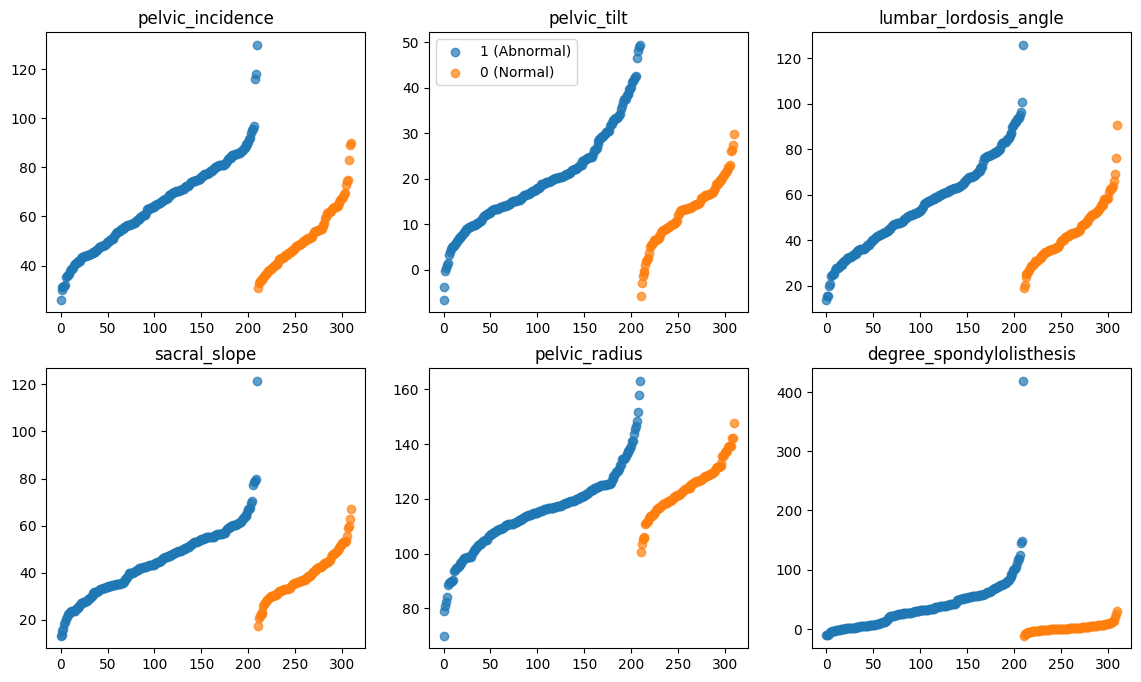

/tmp/ipython-input-2229053625.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,1].legend()


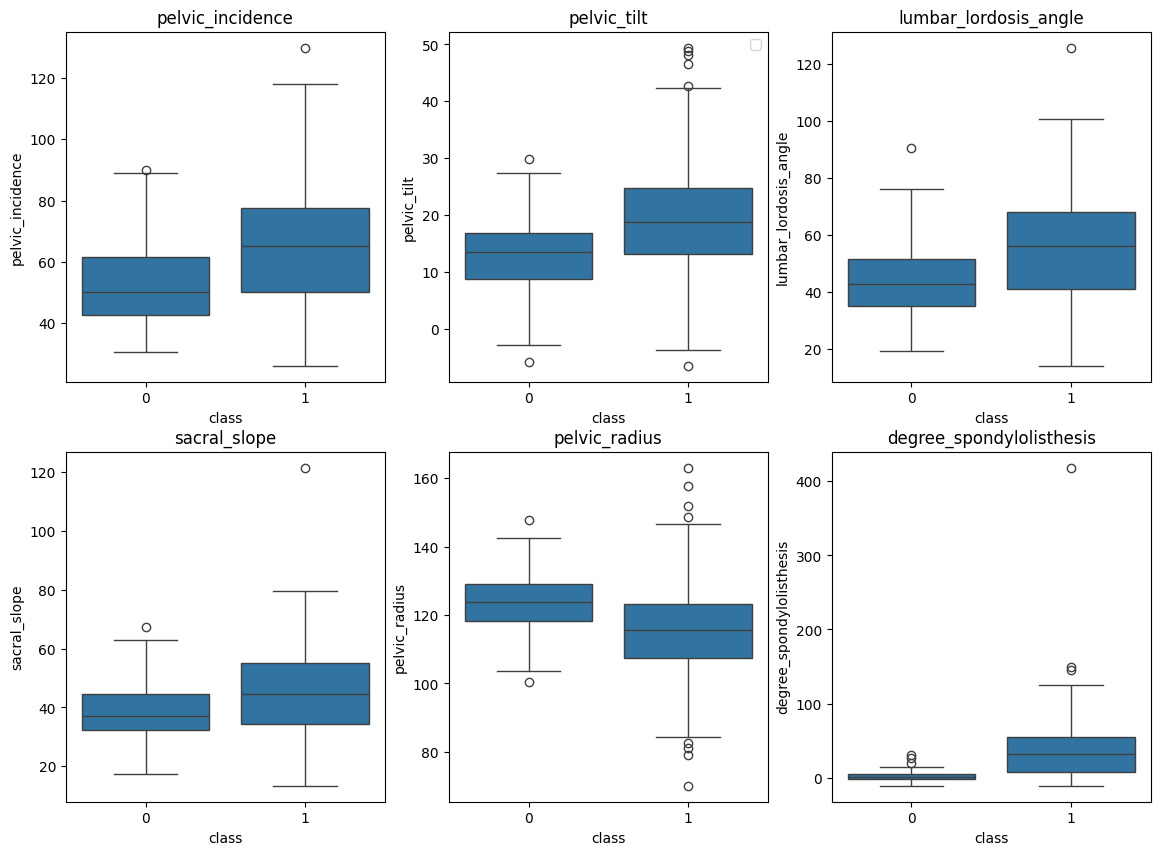

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
for i, var in enumerate(independent_variables):
  pos = sorted(df_pos[var].to_numpy())
  neg = sorted(df_neg[var].to_numpy())
  x_pos = np.arange(len(pos))
  x_neg = np.arange(len(pos), len(pos) + len(neg))
  if i < 3:
    axs = axes[0,i]
  else:
    axs = axes[1,i-3]
  axs.scatter(x_pos, pos, label='1 (Abnormal)', alpha=0.7)
  axs.scatter(x_neg, neg, label='0 (Normal)', alpha=0.7)
  axs.set_title(var)

axes[0,1].legend()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/dsci_552_hw/HW1/scatter.png")
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,10))
for i, var in enumerate(independent_variables):
  pos = sorted(df_pos[var].to_numpy())
  neg = sorted(df_neg[var].to_numpy())
  if i < 3:
    axs = axes[0,i]
  else:
    axs = axes[1,i-3]
  sns.boxplot(data=df, x="class", y=var, ax=axs)

  axs.set_title(var)

axes[0,1].legend()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/dsci_552_hw/HW1/boxplot.png")
plt.show()
